In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("may.csv")

In [22]:
df.head()

,Sale ID,User,User name,User last name,Time,Date,Outlet ID,Outlet,TIN,Outlet Segment,...,Price with VAT,Item name,Item quantity,Item price without VAT,Item VAT,Item price with VAT,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,628276bd2cea787bef089928,tangut.tewabe,Tangut,Tewabe,19:07,16/05/2022,61de9a072cea787beffa353a,chanale 5,0023738448,Bar And Restaurant,...,1400.02,Lime,2,1217.4,182.62,1400.02,NaN,NaN,NaN,NaN
1,6282768d2cea787bef08990c,tangut.tewabe,Tangut,Tewabe,19:06,16/05/2022,61de932f2cea787beffa32eb,havana,0046705738,Bar And Restaurant,...,5600.08,Lime,8,4869.6,730.48,5600.08,NaN,NaN,NaN,NaN
2,628276312cea787bef089908,tangut.tewabe,Tangut,Tewabe,19:05,16/05/2022,61f827032cea787beffbd53c,sole,NaN,Stockist,...,9100.13,Apple,3,1826.1,273.93,2100.03,NaN,NaN,NaN,NaN
3,628276312cea787bef089908,tangut.tewabe,Tangut,Tewabe,19:05,16/05/2022,61f827032cea787beffbd53c,sole,NaN,Stockist,...,9100.13,Lime,10,6087.0,913.10,7000.10,NaN,NaN,NaN,NaN
4,628275c72cea787bef089904,tangut.tewabe,Tangut,Tewabe,19:03,16/05/2022,620633502cea787beffd190a,cool,NaN,Grocery,...,1400.02,Lime,2,1217.4,182.62,1400.02,NaN,NaN,NaN,NaN


### Cleaning up the data


In [5]:
df.isnull().values.any()


True

In [6]:
df.isnull().values.any()

True

#### make Columns to correct data taype 

In [9]:
df['Total'] = pd.to_numeric(df['Total'])

In [10]:
type(df['Sales Date'])

pandas.core.series.Series

In [11]:
df['Date'] = df['Date'].dt.strftime('%d-%m%Y')

KeyError: 'Date'

In [12]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')

AttributeError: 'DataFrame' object has no attribute 'Date'

##### Adding month column

In [13]:
df['Month'] = df['Date'].str[0:1]
df['Month'] = pd.to_numeric(df['Month'])
df.tail()

KeyError: 'Date'

# Data Exploration!

##### Question 1: What was the best month for sales? How much was earned that month?

In [95]:
df['Sales'] = df['Item quantity'].astype('int') * df['Item price with VAT'].astype('float')

In [96]:
df.groupby(['Month']).sum()

,Price without VAT,Vat,Price with VAT,Item quantity,Item price without VAT,Item VAT,Item price with VAT,Sales
Month,,,,,,,,
1,8.487520e+07,12730198.20,9.760540e+07,93517,32337429.42,4850272.58,37187702.00,3.473984e+08
2,1.114147e+08,16710510.69,1.281252e+08,141277,43340471.69,6500549.63,49841021.32,5.081665e+08
3,7.340483e+07,11009607.42,8.441444e+07,92496,28457109.95,4268225.04,32725334.99,3.554538e+08


In [59]:
df.drop("Year", axis=1, inplace=True)

range(1, 4)


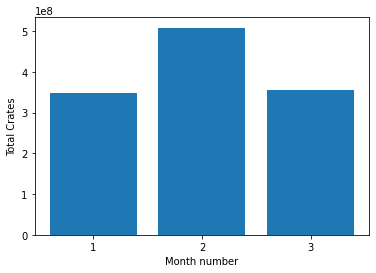

In [97]:
months = range(1,4)
print(months)

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Total Crates')
plt.xlabel('Month number')
plt.show()

#### Question 2: What Territory sold the most product?

In [99]:
df.groupby(['District']).sum()

,Price without VAT,Vat,Price with VAT,Item quantity,Item price without VAT,Item VAT,Item price with VAT,Month,Sales
District,,,,,,,,,
ADDIS ABABA,1.652656e+08,24787777.99,190053411.1,187646,65408181.22,9810540.81,75218722.03,96550,5.987003e+08
East District,4.793052e+07,7188527.60,55119048.0,79133,18758950.77,2813546.23,21572497.00,31448,2.437929e+08
South District,5.647506e+07,8470492.01,64945553.5,60353,19959511.57,2993705.71,22953217.28,35749,3.684267e+08


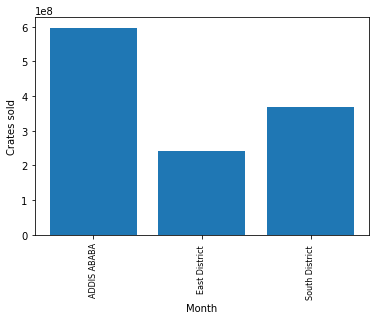

In [106]:
keys = [District for District, df in df.groupby(['District'])]

plt.bar(keys,df.groupby(['District']).sum()['Sales'])
plt.ylabel('Crates sold')
plt.xlabel('Month')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

### Question 4: What products are most often sold together?

In [110]:
df = df[df['Sale ID'].duplicated(keep=False)]


df['Grouped'] = df.groupby('Sale ID')['Item name'].transform(lambda x: ','.join(x))
df2 = df[['Sale ID', 'Grouped']].drop_duplicates()

C:\Users\Fraol\AppData\Local\Temp/ipykernel_6016/1240118231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Sale ID')['Item name'].transform(lambda x: ','.join(x))


In [111]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Lime', 'PG') 17868
('Apple', 'Lime') 14785
('Apple', 'PG') 12552
('GHL', 'Lime') 3239
('GHL', 'PG') 2646
('Bottle', 'Lime') 2426
('Apple', 'GHL') 2416
('Bottle', 'PG') 1536
('Apple', 'Bottle') 1253
('Bottle', 'Crate') 713


#### What product sold the most? Why do you think it sold the most?

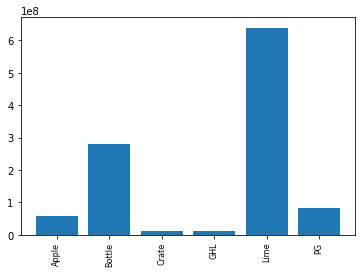

In [113]:
product_group = df.groupby('Item name')
quantity_ordered = product_group.sum()['Sales']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

NameError: name 'keys' is not defined

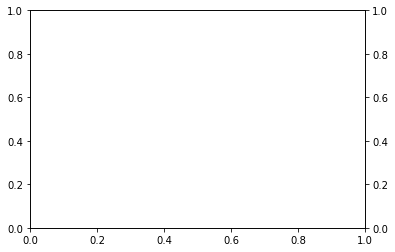

In [24]:
prices = df.groupby('Item name').mean()['Price with VAT']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Item name')
ax1.set_ylabel('Item quantity', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()